## CMPINF 2100 Week 10 | Making Predictions with Linear Models

We will make predictions for the NON LINEAR trend to input relationships!

Thus, we are making predictions when a NON-LINEAR FEATURE is derrived from the INPUT!

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

### Read Data

In [2]:
df = pd.read_csv('week_10_nonlinear_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               15 non-null     float64
 1   trend           15 non-null     float64
 2   y               15 non-null     float64
 3   true_intercept  15 non-null     float64
 4   true_slope      15 non-null     float64
 5   true_sigma      15 non-null     float64
dtypes: float64(6)
memory usage: 848.0 bytes


### Fit the Linear Model

The model includes a NON-LINEAR feature derived from the INPUT. The `smf.ols()` formula APPLIES that non-linear function directly in the formula!

In [4]:
lm_fit = smf.ols(formula='y ~ np.sin(x)' , data=df).fit()

In [5]:
lm_fit.params

Intercept    0.098301
np.sin(x)   -2.216698
dtype: float64

In [6]:
lm_fit.bse

Intercept    0.076712
np.sin(x)    0.109770
dtype: float64

In [7]:
lm_fit.pvalues

Intercept    2.224278e-01
np.sin(x)    3.362554e-11
dtype: float64

In [8]:
lm_fit.conf_int().\
rename(columns={0: 'ci_lwr', 1: 'ci_upr'})

,ci_lwr,ci_upr
Intercept,-0.067425,0.264027
np.sin(x),-2.453842,-1.979555


### Make Predictions

Create a data set just to visualize the predictive behavior of the output GIVEN the input.

In [9]:
df_viz = pd.DataFrame({'x': np.linspace( df.x.min()-0.1, df.x.max()+0.1, num=101)})

In [10]:
df_viz

,x
0,-3.100
1,-3.038
2,-2.976
3,-2.914
4,-2.852
...,...
96,2.852
97,2.914
98,2.976
99,3.038


Let's jump straight to visualizing the predictive TREND (mean output), the CI (the uncertainty on the mean), and the PI (the uncertainty on a single measurement).

We need the same 2 step approach

Step 1: call the `.get_prediction()` method on the fitted object.

In [12]:
predictions = lm_fit.get_prediction( df_viz )

Step 2: call the `.summary_frame()` method on the Prediction Object.

In [14]:
lm_pred_summary = predictions.summary_frame()

In [15]:
lm_pred_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.190473,0.076848,0.024454,0.356492,-0.472504,0.853450
1,0.327524,0.077547,0.159994,0.495054,-0.335833,0.990881
2,0.463695,0.078817,0.293421,0.633968,-0.200360,1.127750
3,0.598461,0.080611,0.424311,0.772611,-0.066598,1.263521
4,0.731305,0.082869,0.552278,0.910333,0.064952,1.397659
...,...,...,...,...,...,...
96,-0.534704,0.082869,-0.713731,-0.355676,-1.201057,0.131650
97,-0.401859,0.080611,-0.576009,-0.227709,-1.066919,0.263200
98,-0.267093,0.078817,-0.437366,-0.096819,-0.931148,0.396962
99,-0.130922,0.077547,-0.298453,0.036608,-0.794279,0.532435


Visualize the predictive mean (trend), the CI, and the PI on a single graphic.

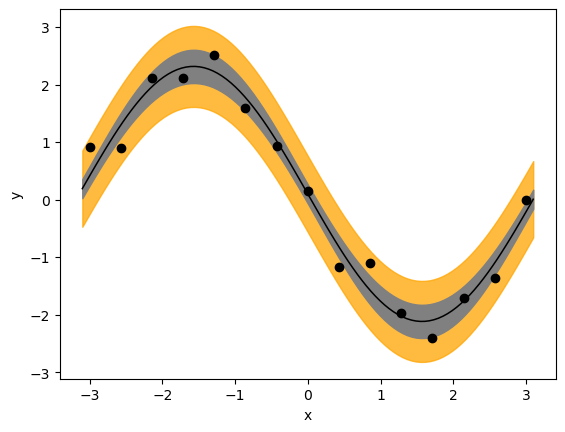

In [19]:
fig, ax = plt.subplots()

# prediction interval
ax.fill_between( df_viz.x,
                 lm_pred_summary.obs_ci_lower, lm_pred_summary.obs_ci_upper,
                 facecolor='orange', alpha=0.75, edgecolor='orange' )
# confidence interval
ax.fill_between( df_viz.x,
                 lm_pred_summary.mean_ci_lower, lm_pred_summary.mean_ci_upper,
                 facecolor='grey', edgecolor='grey')
# trend
ax.plot( df_viz.x, lm_pred_summary['mean'], color='k', linewidth=1.1)
# include the training data
ax.scatter( df.x, df.y, color='k')
# set the labels
ax.set_xlabel('x')
ax.set_ylabel('y')
# show the plot
plt.show()